# **HR Analytics**

In [51]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [52]:
# Storing the  data
employee_attrition_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Dataset Information**


In [53]:
employee_attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [54]:
# Creating a Dataframe containing the datatype, count,number of unique values,sum of the null values and sum of the duplicates in each column
list=[]
for col in employee_attrition_data.columns:
        columns = employee_attrition_data.columns
        dtype = employee_attrition_data[col].dtypes
        instances = employee_attrition_data[col].count()
        unique = employee_attrition_data[col].nunique()
        sum_null = employee_attrition_data[col].isnull().sum()
        duplicates = employee_attrition_data[col].duplicated().sum()
        list.append([dtype,instances,unique,sum_null,duplicates])
data_check = pd.DataFrame(list,columns=["dtype","instances","unique","sum_null","duplicates"],index=employee_attrition_data.columns)
data_check

,dtype,instances,unique,sum_null,duplicates
Age,int64,1470,43,0,1427
Attrition,object,1470,2,0,1468
BusinessTravel,object,1470,3,0,1467
DailyRate,int64,1470,886,0,584
Department,object,1470,3,0,1467
DistanceFromHome,int64,1470,29,0,1441
Education,int64,1470,5,0,1465
EducationField,object,1470,6,0,1464
EmployeeCount,int64,1470,1,0,1469
EmployeeNumber,int64,1470,1470,0,0


In [55]:
# Converting Categorical columns to Numerical
from sklearn.preprocessing import LabelEncoder
numerical_df = employee_attrition_data.copy()
categorical_columns = numerical_df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    numerical_df[column] = label_encoder.fit_transform(numerical_df[column])

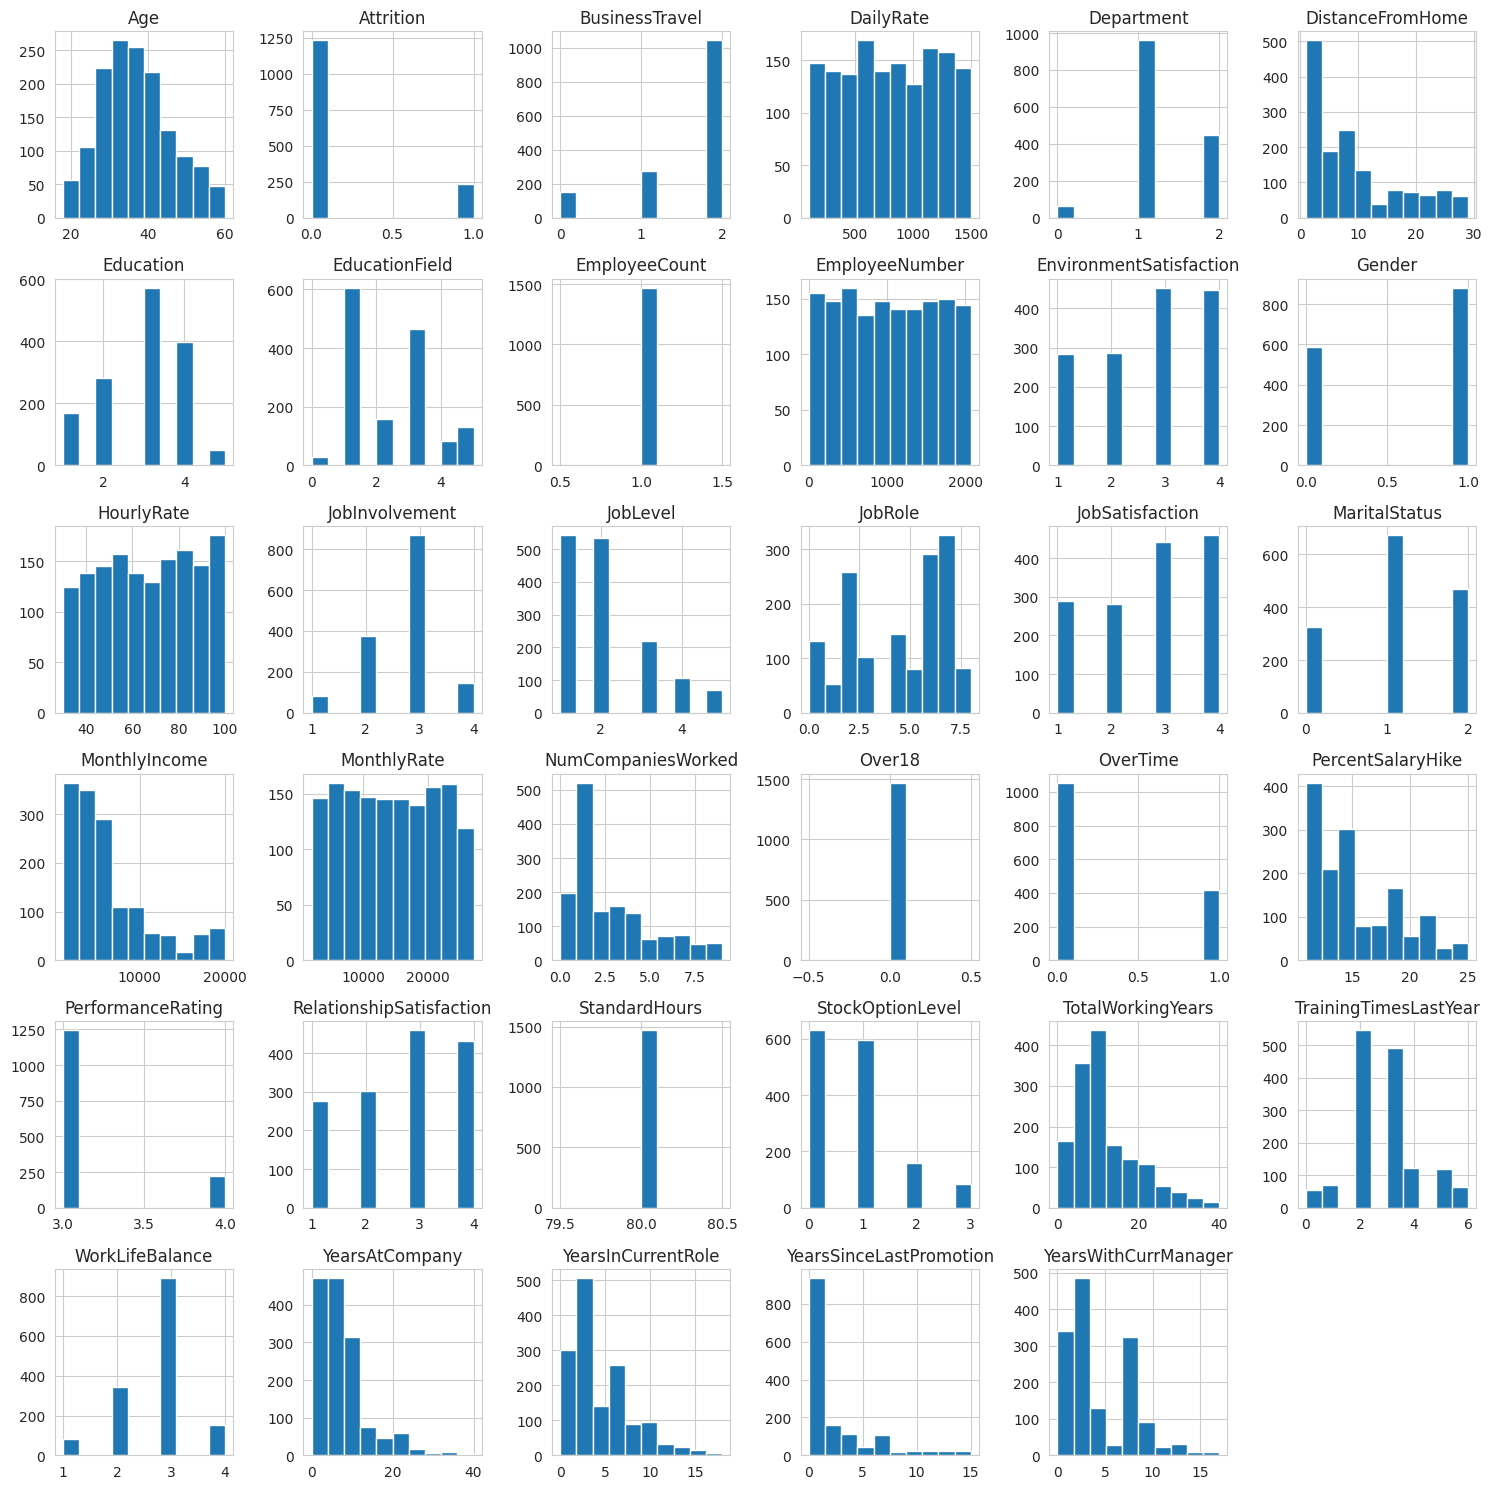

In [56]:
#Histogram of each column
numerical_df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [57]:
# Unique values present in each Column
unique_values_df = pd.DataFrame(columns=['Column', 'Unique_Values'])
for column in employee_attrition_data.columns:
    unique_values = employee_attrition_data[column].unique()
    unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
unique_values_df

<ipython-input-57-214ef48441e2>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-57-214ef48441e2>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-57-214ef48441e2>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-57-214ef48441e2>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-57-214ef48441e2>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-57-214ef48441e2>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,Column,Unique_Values
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,"[Yes, No]"
2,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,"[2, 1, 4, 3, 5]"
7,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,[1]
9,EmployeeNumber,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


Heatmap of Correlation Matrix

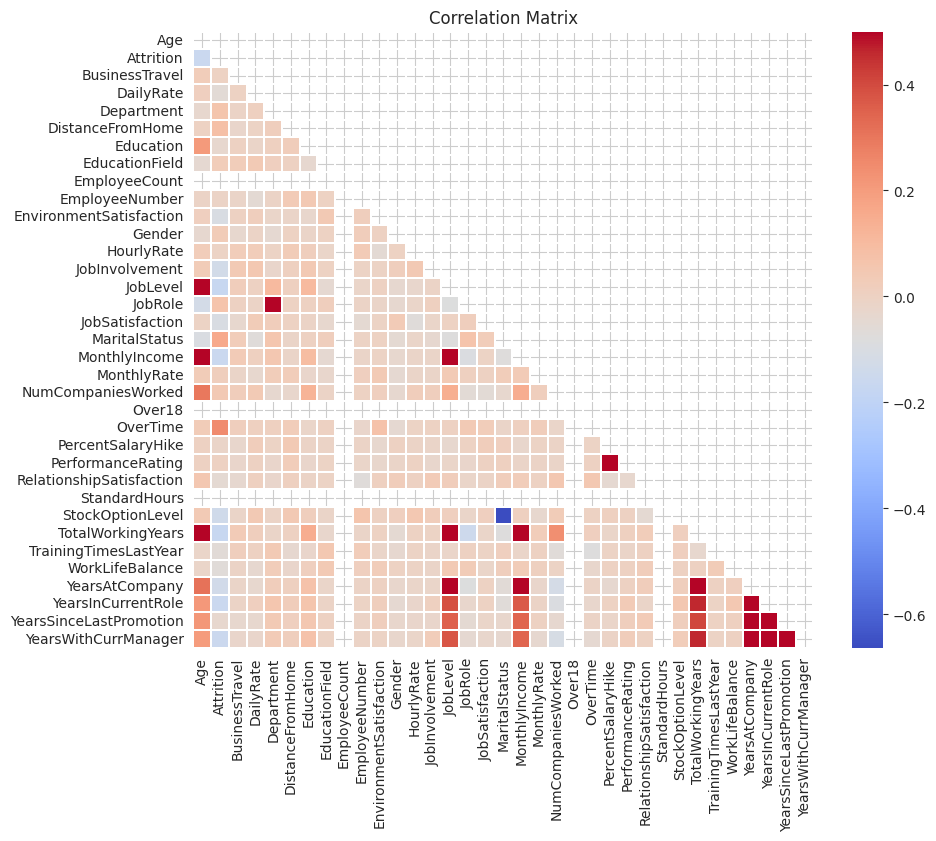

In [59]:
corr = numerical_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=.5, mask=mask, linewidths=.2, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dropping Unwanted Columns

In [60]:

employee_attrition_data.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','PerformanceRating'],axis=1,inplace=True)

In [61]:
employee_attrition_data.shape

(1470, 30)

**EDA**

Visualization of Attrition

In [62]:

attrition_pie = px.pie(employee_attrition_data, names='Attrition', title='Attrition Distribution')
attrition_pie.show()

In [63]:

fig = px.box(employee_attrition_data, x='Attrition', y='Age', title='Age vs Attrition')
fig.show()

Above Boxplot indicates that there might be a higher proportion of younger employees among those who left the company.

In [64]:

plot = employee_attrition_data.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')

fig = px.bar(plot, x='NumCompaniesWorked', y='Counts', color='Attrition',
             barmode='stack', labels={'Counts': 'Counts', 'NumCompaniesWorked': 'Number of Companies Worked'},
             title='Count of Employees by Number of Companies Worked and  Attrition Status',
             category_orders={'Attrition': ['No', 'Yes']})

fig.show()

As the employee works in more than 4 companies, chances of attrition increases

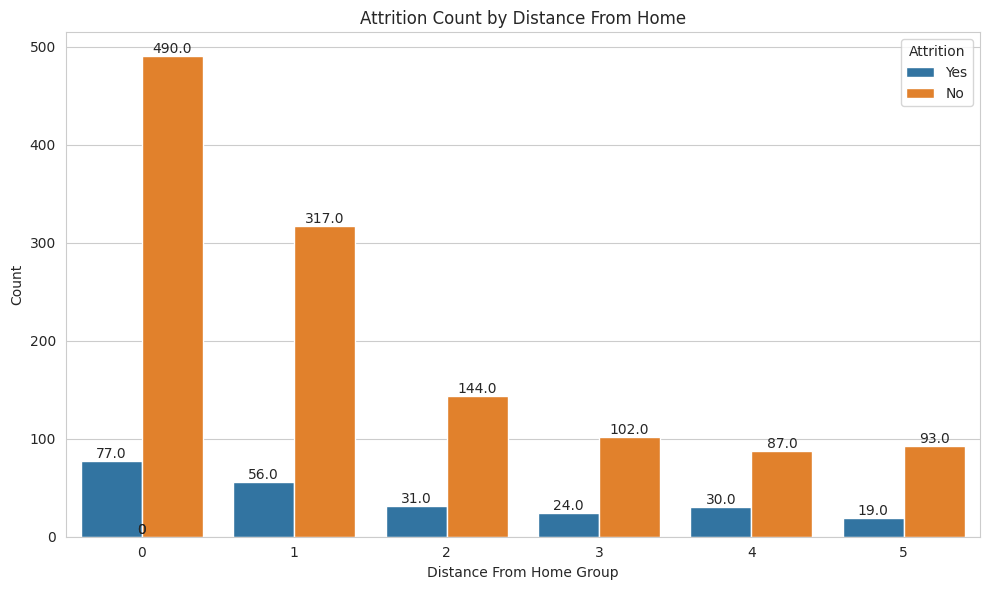

In [66]:
employee_attrition_data['DistanceFromHome_Group'] = employee_attrition_data['DistanceFromHome'] // 5

plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceFromHome_Group', hue='Attrition', data=employee_attrition_data)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points')

plt.title('Attrition Count by Distance From Home')
plt.xlabel('Distance From Home Group')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

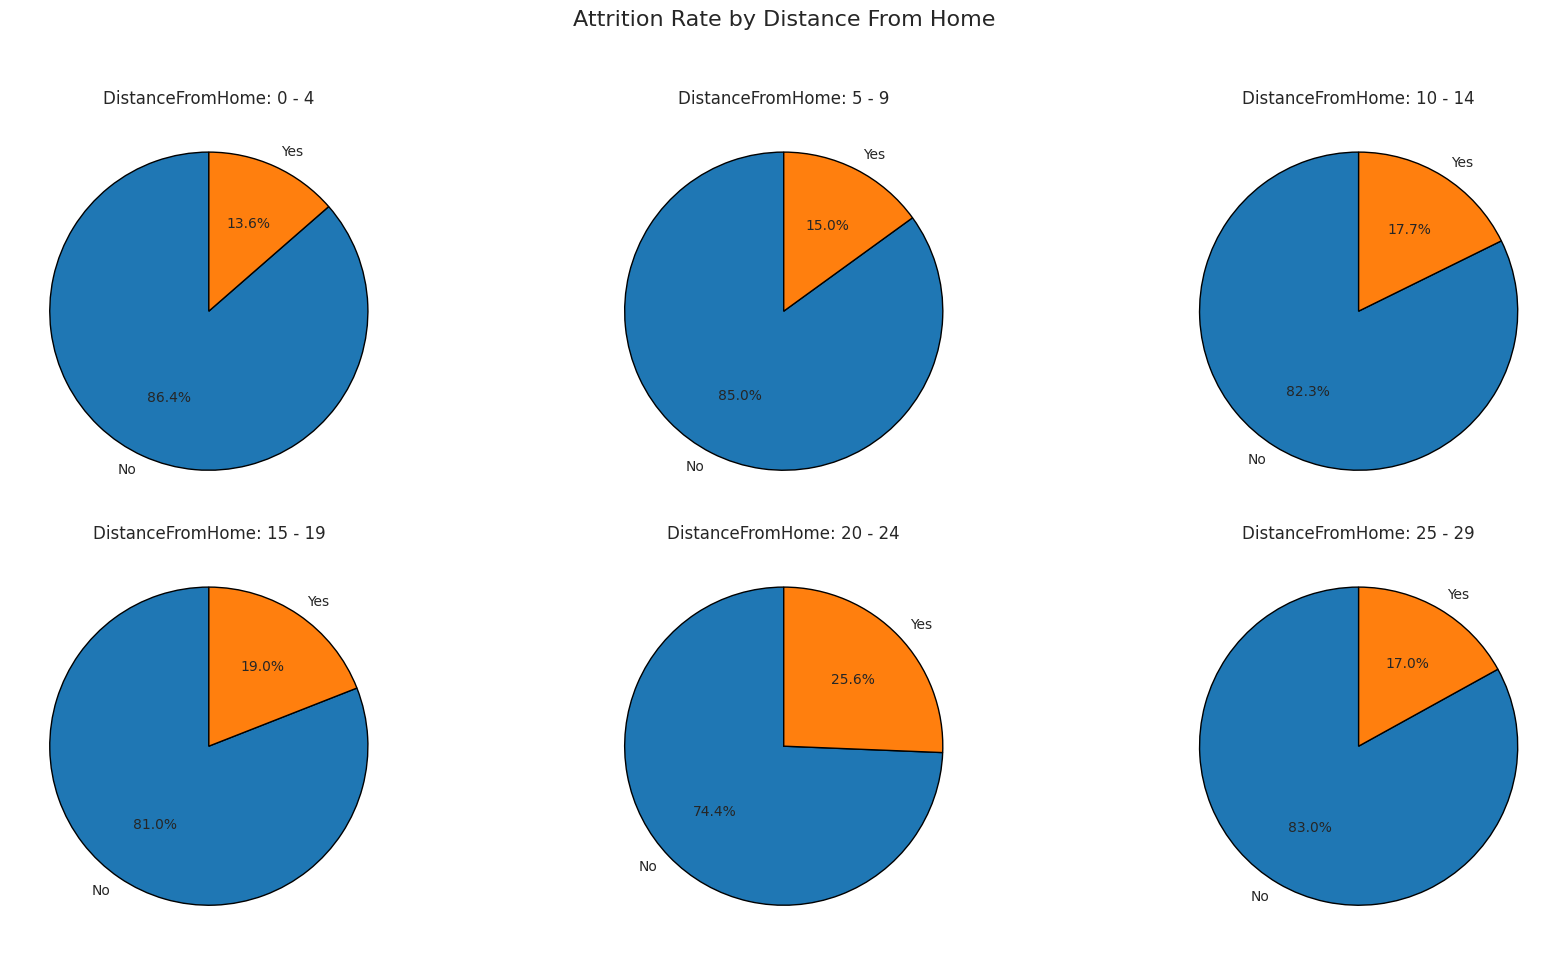

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(2):
    for j in range(3):
        group_filter = employee_attrition_data['DistanceFromHome_Group'] == (j + i*3)
        group_data = employee_attrition_data[group_filter]

        counts = group_data['Attrition'].value_counts()
        attrition_percentages = counts / counts.sum() * 100

        ax = axes[i][j]
        ax.pie(attrition_percentages, labels=attrition_percentages.index, autopct='%1.1f%%', startangle=90,
                wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
        ax.set_title(f'DistanceFromHome: {(j + i*3)*5} - {(j + i*3)*5 + 4}')

plt.suptitle('Attrition Rate by Distance From Home', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From seeing the 1st graph employees living near(0-4)km to the company have most attrition rate, but percentage of attrition shows that (0-4)km has the least attrition

<ipython-input-68-1fb94a953cea>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




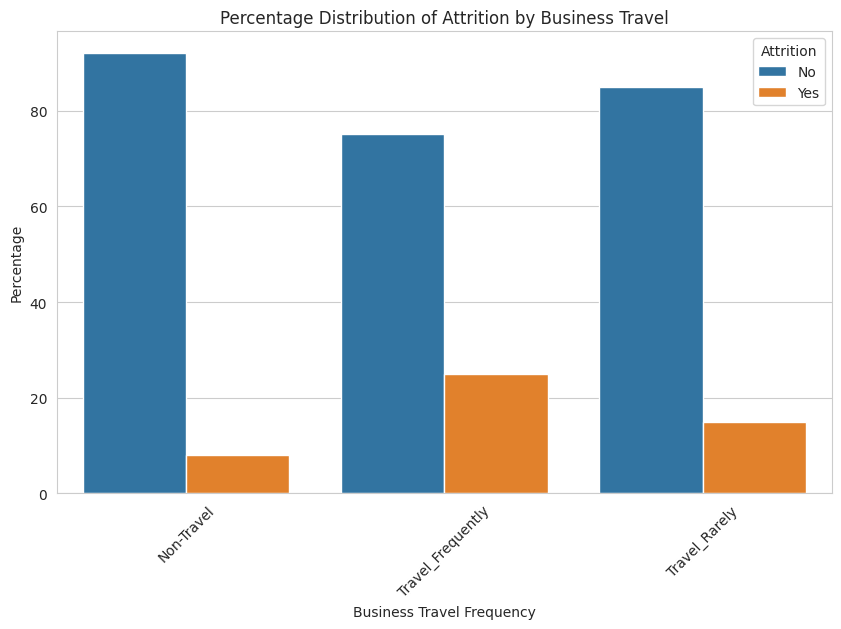

In [68]:
attrition_percentage = employee_attrition_data.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=attrition_percentage, x='BusinessTravel', y='Percentage', hue='Attrition', ci=None)
plt.title('Percentage Distribution of Attrition by Business Travel')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Percentage')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.show()

As the Employees Travelling Frequency increases the Attrition percentage increses

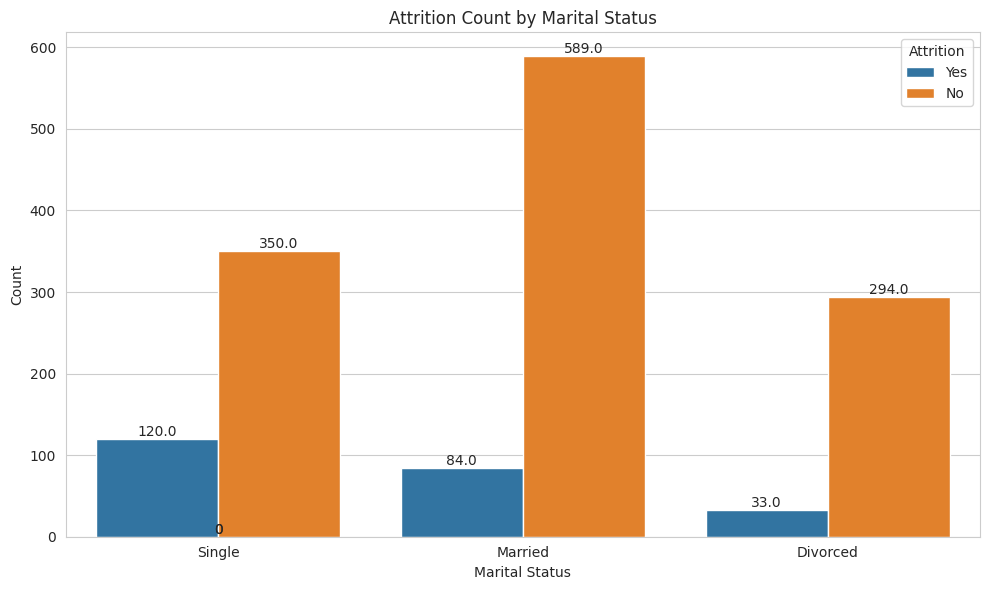

In [69]:

plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_attrition_data, palette=['#1f77b4', '#ff7f0e'])


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points')

plt.title('Attrition Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Single employees have attrited the most. Married employees occupy the 2nd place and Divorced come at the last position.

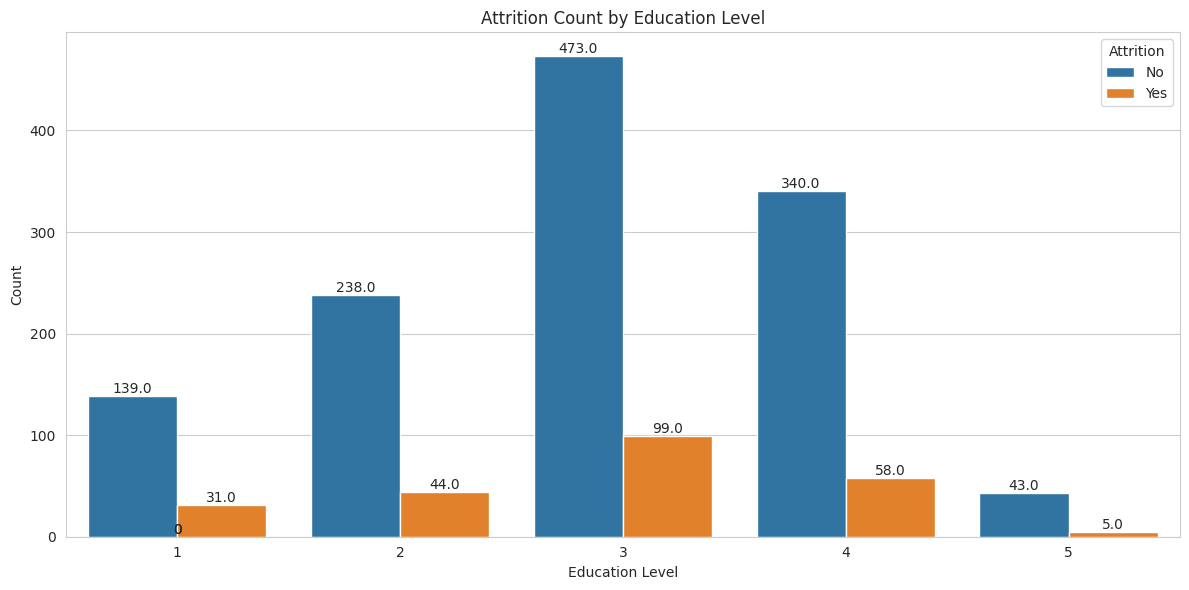

In [70]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Attrition', data=employee_attrition_data, palette=['#1f77b4', '#ff7f0e'])

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points')

plt.title('Attrition Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

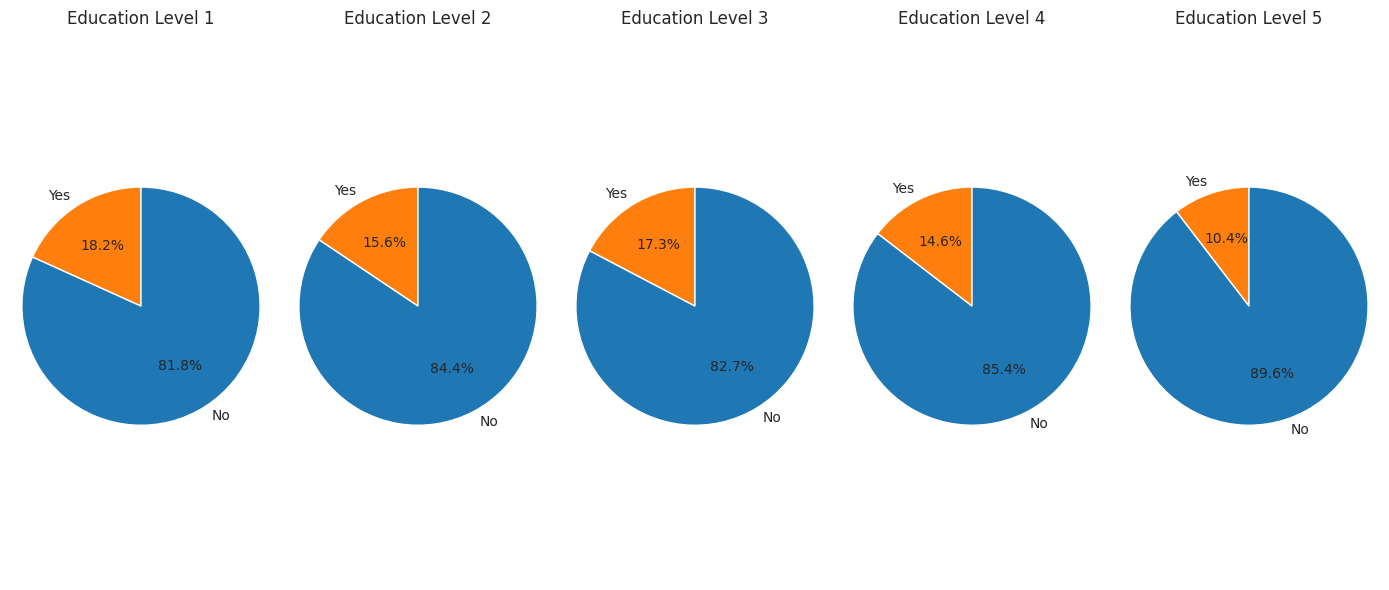

In [71]:
education_counts = employee_attrition_data['Education'].value_counts()
attrition_counts = employee_attrition_data.groupby('Education')['Attrition'].value_counts()

plt.figure(figsize=(14, 6))
for i, edu_level in enumerate(range(1, 6), start=1):
    plt.subplot(1, 5, i)

    attrition_percentage = attrition_counts.get((edu_level, 'Yes'), 0) / education_counts.get(edu_level, 1) * 100

    sizes = [attrition_percentage, 100 - attrition_percentage]
    colors = ['#ff7f0e', '#1f77b4']
    labels = ['Yes','No']
    plt.pie(sizes, labels = labels,autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Education Level {edu_level}')
    plt.axis('equal')

plt.tight_layout()
plt.show()

In the graph Employees with Level 3 education have the highest
attrition count .
Level 1 comes 4th rank in the graph but has the highest attrition percentage in the pie chart.


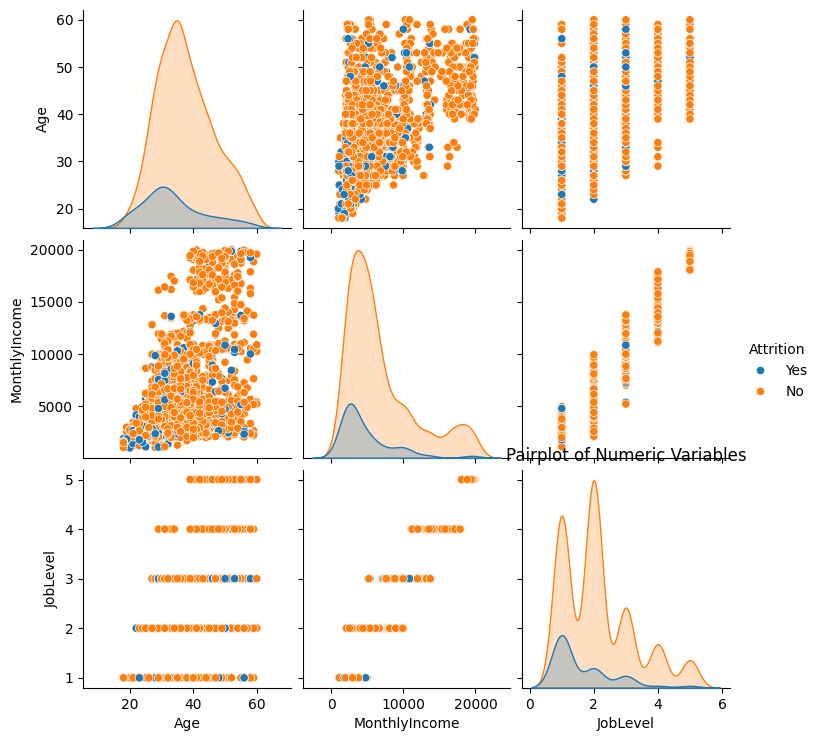

In [ ]:
#Multivariate Analysis: Explore relationships between multiple variables
# Pairplot of Numeric Variables
sns.pairplot(employee_attrition_data[['Age', 'MonthlyIncome', 'JobLevel', 'Attrition']], hue='Attrition')
plt.title('Pairplot of Numeric Variables')
plt.show()

In [72]:
attrition_percentages = employee_attrition_data.groupby('Department')['Attrition'].value_counts(normalize=True) * 100

attrition_percentages = attrition_percentages.reset_index(name='Percentage')

fig = px.bar(attrition_percentages, x='Department', y='Percentage', color='Attrition',
             title='Attrition Percentage by Department', barmode='stack')

# Show the plot
fig.show()

Sales and Human Resources shows Higher attrition rate compared to Research and Development

In [73]:
fig = px.histogram(employee_attrition_data, x='JobRole', color='Attrition',
                   barmode='group', labels={'JobRole': 'Job Role'},
                   title='Counts of Employees by Job Role and Attrition Status',
                   category_orders={'Attrition': ['No', 'Yes']})
fig.show()

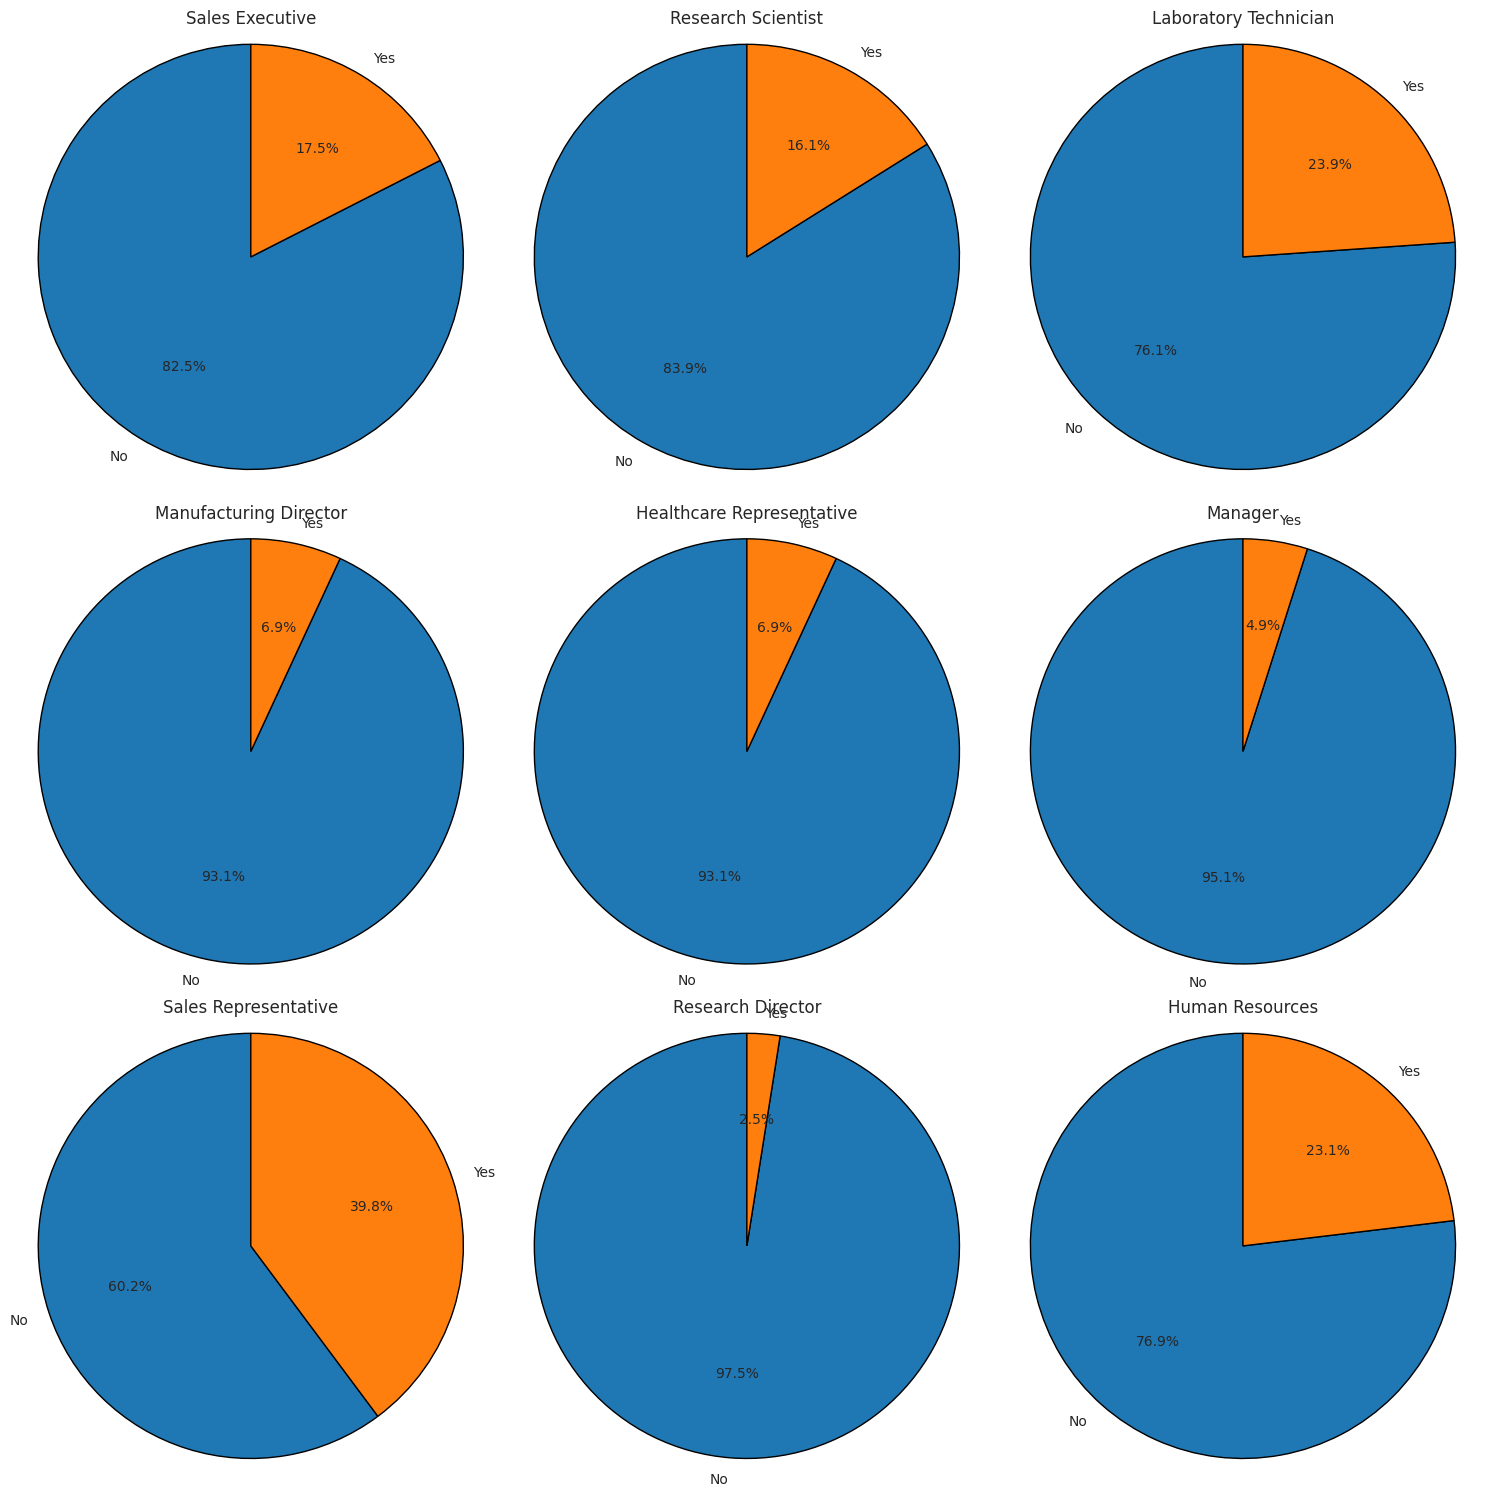

In [74]:
job_roles = employee_attrition_data['JobRole'].unique()

num_plots = len(job_roles)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, job_role in enumerate(job_roles):

    job_role_data = employee_attrition_data[employee_attrition_data['JobRole'] == job_role]

    attrition_percentage = (job_role_data['Attrition'].value_counts(normalize=True) * 100).round(1)

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.pie(attrition_percentage, labels=attrition_percentage.index, autopct='%1.1f%%', startangle=90,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    ax.set_title(f'{job_role}')
    ax.axis('equal')

plt.tight_layout()
plt.show()

Out of the 9 jobroles, 4 jobroles display less than 7% of attrition rate whereas the remaining 5 roles have an attrition rate more than 15%.

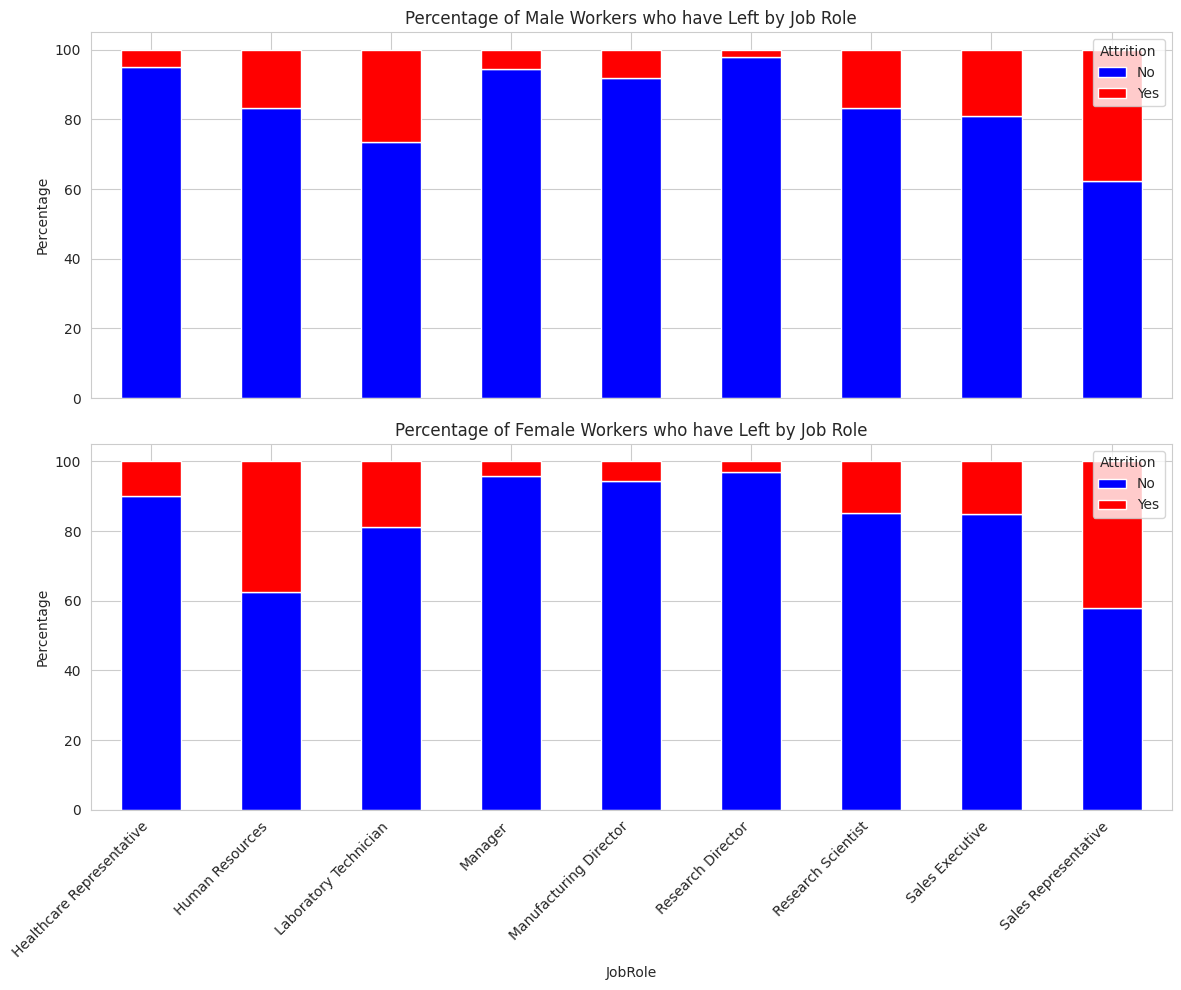

In [75]:
male_data = employee_attrition_data[employee_attrition_data['Gender'] == 'Male']
female_data = employee_attrition_data[employee_attrition_data['Gender'] == 'Female']

male_counts = male_data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
female_counts = female_data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

male_counts = male_counts[['No', 'Yes']]
female_counts = female_counts[['No', 'Yes']]

male_totals = male_counts.sum(axis=1)
female_totals = female_counts.sum(axis=1)
male_percentages = male_counts.div(male_totals, axis=0) * 100
female_percentages = female_counts.div(female_totals, axis=0) * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Male graph
male_percentages.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[0])
axes[0].set_title('Percentage of Male Workers who have Left by Job Role')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Attrition', loc='upper right')

# Female graph
female_percentages.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_title('Percentage of Female Workers who have Left by Job Role')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Attrition', loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Among Male Employees the Sales representative and Laboratory Technician have higher attrition rate. In case of Female Employees the Attrition is higher in Human Resources and Sales Representative


In [76]:

fig = px.histogram(employee_attrition_data, x='JobInvolvement', color='Attrition', title='Attrition by Job Involvement',
                   barmode="stack")

percentages = employee_attrition_data.groupby(['JobInvolvement', 'Attrition']).size() / employee_attrition_data.groupby('JobInvolvement').size() * 100


for satisfaction, attrition, percentage in percentages.reset_index().values:
    if attrition == 'Yes':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text, x=satisfaction, y=percentage, showarrow=False)
    elif attrition == 'No':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text, x=satisfaction, y=percentage + 30, showarrow=False, font={"color":"black"})

fig.update_layout(xaxis_title='Involvement Rate',
                  yaxis_title='Number of employees',
                  bargap=0.5,
                  height=600,
                  width=700)



Higher the Job Involement, lower the attrition rate

In [77]:

fig = px.histogram(employee_attrition_data, x='JobSatisfaction', color='Attrition', title='Attrition by Job Satisfaction',
                   barmode="stack")

percentages = employee_attrition_data.groupby(['JobSatisfaction', 'Attrition']).size() / employee_attrition_data.groupby('JobSatisfaction').size() * 100


for satisfaction, attrition, percentage in percentages.reset_index().values:
    if attrition == 'Yes':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text, x=satisfaction, y=percentage, showarrow=False)
    elif attrition == 'No':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text, x=satisfaction, y=percentage + 30, showarrow=False, font={"color":"black"})

fig.update_layout(xaxis_title='Satisfaction Rate',
                  yaxis_title='Number of employees',
                  bargap=0.5,
                  height=400,
                  width=600)


fig.show()

Lowest Job Satisfaction Rating has Highest Attrition Percentage

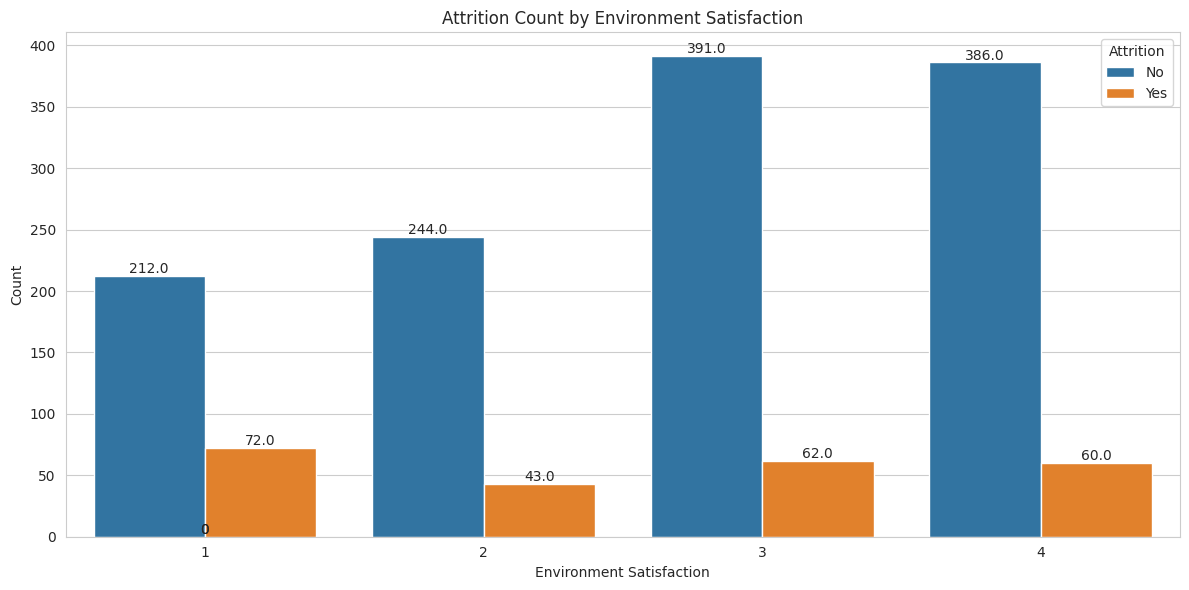

In [78]:

plt.figure(figsize=(12, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=employee_attrition_data)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points')

plt.title('Attrition Count by Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


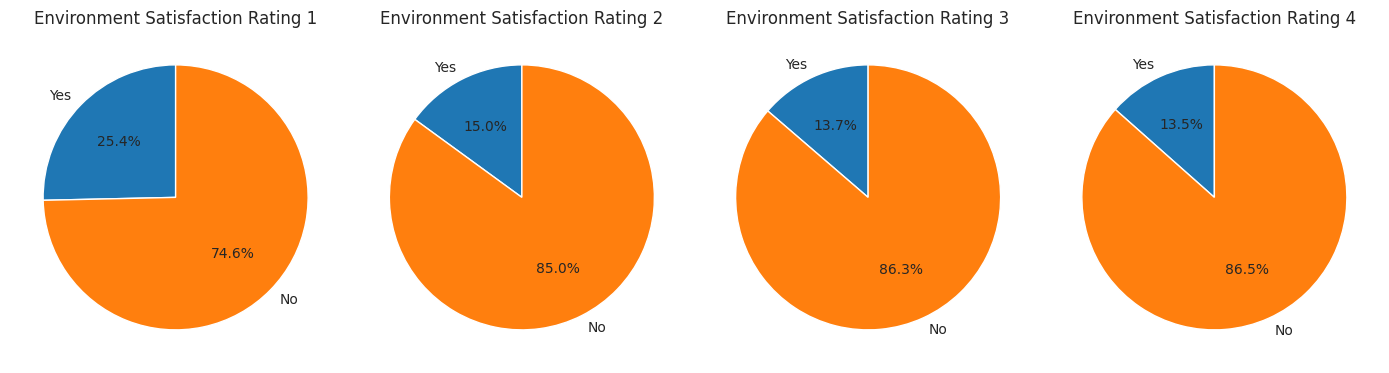

In [79]:
env_satisfaction_ratings = [1, 2, 3, 4]

plt.figure(figsize=(14, 6))

for i, rating in enumerate(env_satisfaction_ratings, start=1):
    plt.subplot(1, len(env_satisfaction_ratings), i)

    data_for_rating = employee_attrition_data[employee_attrition_data['EnvironmentSatisfaction'] == rating]

    attrition_percentage = (data_for_rating['Attrition'].value_counts(normalize=True) * 100).get('Yes', 0)

    labels = ['Yes', 'No']
    sizes = [attrition_percentage, 100 - attrition_percentage]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Environment Satisfaction Rating {rating}')

plt.tight_layout()
plt.show()

Count of Environment satisfaction rating of 3 an 4 is higher but have lower atrrition percentage compared to low ratings

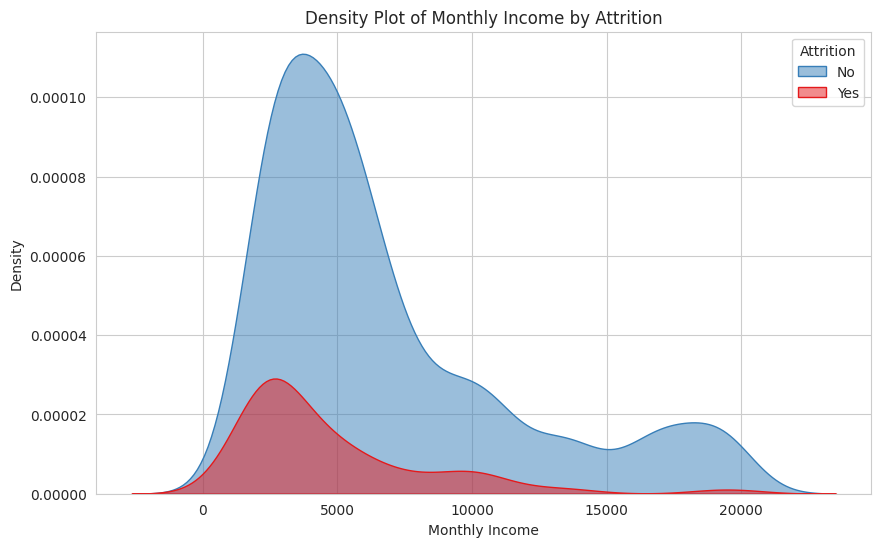

In [80]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=employee_attrition_data, x='MonthlyIncome', hue='Attrition', fill=True, palette='Set1', alpha=0.5)
plt.title('Density Plot of Monthly Income by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

Attriton seems to be higher when the monthly income is between 0-5000, making it an important factor

In [81]:
fig = go.Figure(data=[go.Bar(
    x=employee_attrition_data['JobRole'],
    y=employee_attrition_data['MonthlyIncome'],
    marker=dict(
        color='rgb(255,140,0)',
        opacity=0.7
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Job Role',
                    yaxis_title='Monthly Income'),
                  title='3D Bar Plot of Job Role and Monthly Income',
                  margin=dict(l=0, r=0, b=0, t=40))
fig.show()


Monthly Income of Human Resources and Sales Representative is the least among the Job Roles

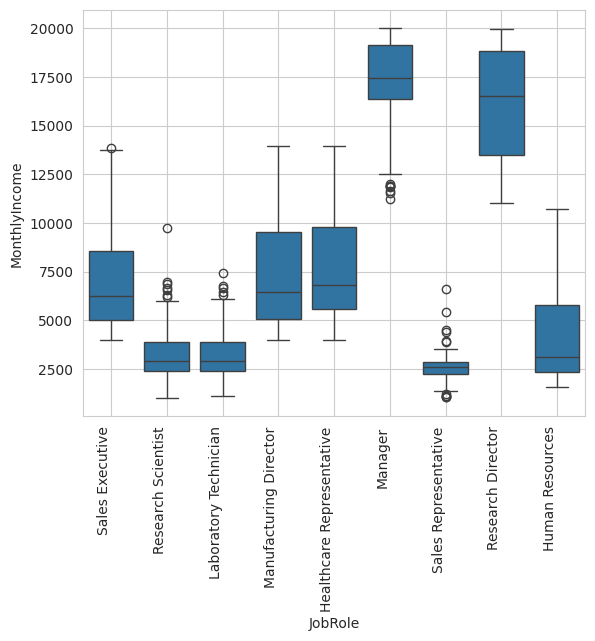

In [82]:

sns.boxplot(y=employee_attrition_data["MonthlyIncome"], x= employee_attrition_data["JobRole"])
plt.grid(True, alpha=1)
plt.tight_layout()
plt.xticks(rotation=90, ha='right')
plt.show()

Managers and Research Directors have the highest median monthly incomes and
Sales Representatives and Human Resources have the lowest median monthly incomes

In [83]:
stock_att=employee_attrition_data.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock Option facilities level by Employee count')

Attrition of employees reduces as the Stock Option Level increases.

In [85]:
hike_att=employee_attrition_data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of employees receiving Hike Percentages in the organisation',height =600,width =800)

low salary hikes of 11 - 14 have been given to a lot of employees and  the attrition is high as well.

In [86]:
plot_df = employee_attrition_data.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group',
             category_orders={'Attrition': ['Yes', 'No']},
             )
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1,ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height =950,width=1000,
                  xaxis_title='Work Life Balance',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4]),)
fig.show()

Among male employees the least work life balance rating has the highest attrition. Same cannot be said about Female Employees.

In [87]:
years_at_company_att = employee_attrition_data.groupby(['YearsAtCompany', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

total_counts = years_at_company_att.groupby('YearsAtCompany')['Counts'].transform('sum')

years_at_company_att['Attrition_Percentage'] = (years_at_company_att['Counts'] / total_counts) * 100

fig = px.bar(years_at_company_att, x='YearsAtCompany', y='Counts', color='Attrition',
             title='Attrition by Number of Years At Company',
             labels={'YearsAtCompany': 'Years t Company', 'Counts': 'Count'},
             color_discrete_map={'Yes': 'red', 'No': 'blue'},
             hover_data={'Counts': True, 'Attrition_Percentage': ':.2f%'})

fig.show()

Initial 4 years shows higher attrition rates with freshers showing the highest.

In [89]:
df = employee_attrition_data.groupby(['YearsSinceLastPromotion', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

total_counts = df.groupby('YearsSinceLastPromotion')['Counts'].transform('sum')

df['Attrition_Percentage'] = (df['Counts'] / total_counts) * 100

fig = px.bar(df, x='YearsSinceLastPromotion', y='Counts', color='Attrition',
             title='Years Since Last Promotion for Employees vs Attrition',
             labels={'YearsSinceLastPromotion': 'Years Since Last Promotion', 'Counts': 'Count'},
             color_discrete_map={'Yes': 'red', 'No': 'blue'},
             hover_data={'Counts': True, 'Attrition_Percentage': ':.2f%'})

fig.show()

Though the Plot the shows high attrition in initial 2 years and attrition distribution for year doesnt show any steady increase or decrease
Highest attrition percentage can be seen in 9 and 15 years

In [91]:
years_in_current_role_att = employee_attrition_data.groupby(['YearsInCurrentRole', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

total_counts = years_in_current_role_att.groupby('YearsInCurrentRole')['Counts'].transform('sum')

years_in_current_role_att['Attrition_Percentage'] = (years_in_current_role_att['Counts'] / total_counts) * 100

fig = px.bar(years_in_current_role_att, x='YearsInCurrentRole', y='Counts', color='Attrition',
             title='Attrition vs Years In Current Role for Employees',
             labels={'YearsInCurrentRole': 'Years In Current Role', 'Counts': 'Count'},
             color_discrete_map={'Yes': 'red', 'No': 'blue'},
             hover_data={'Counts': True, 'Attrition_Percentage': ':.2f%'})

fig.show()

 Attriton percentage for freshers and employees in same job role for 15 years is the highest.
Employees working for 11 and above 16 years have 0 employees leaving

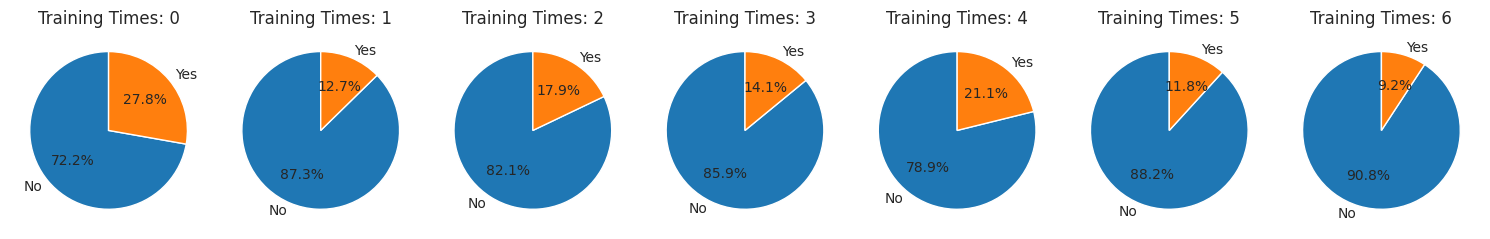

In [97]:
attrition_percentage = employee_attrition_data.groupby('TrainingTimesLastYear')['Attrition'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

categories = attrition_percentage['TrainingTimesLastYear'].unique()

fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    data = attrition_percentage[attrition_percentage['TrainingTimesLastYear'] == category]
    ax = axes[i] if len(categories) > 1 else axes
    ax.pie(data['Percentage'], labels=data['Attrition'], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Training Times: {category}')

plt.tight_layout()
plt.show()

Employees with 0 Training have shown highest Attrition but there is no linear relationship between Attrition and Training